In [3]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from scipy.stats import norm,skew
from scipy.special import boxcox1p   # applies Box-Cox transform for x+1
from scipy.stats import boxcox_normmax   # finds lambda for Box-Cox


from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import average_precision_score , precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge , Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance

#to ignore warning
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv(r"C:\Users\Acer\Downloads\archive\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
print((df.groupby('Class')['Class'].count()/df['Class'].count())*100)
((df.groupby('Class')['Class'].count()/df['Class'].count())*100).plot.pie()

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<Axes: ylabel='Class'>

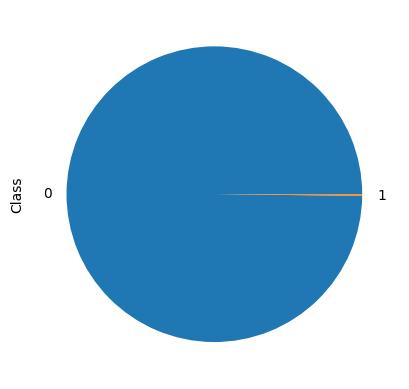

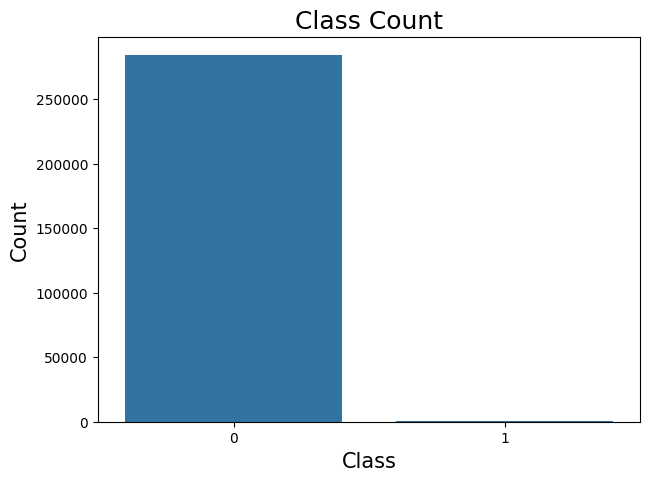

In [10]:
plt.figure(figsize=(7,5))
sns.countplot(x="Class", data=df)   # correct syntax
plt.title("Class Count", fontsize=18)
plt.xlabel("Class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()


In [11]:
corr=df.corr() #checking the correlation
corr


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


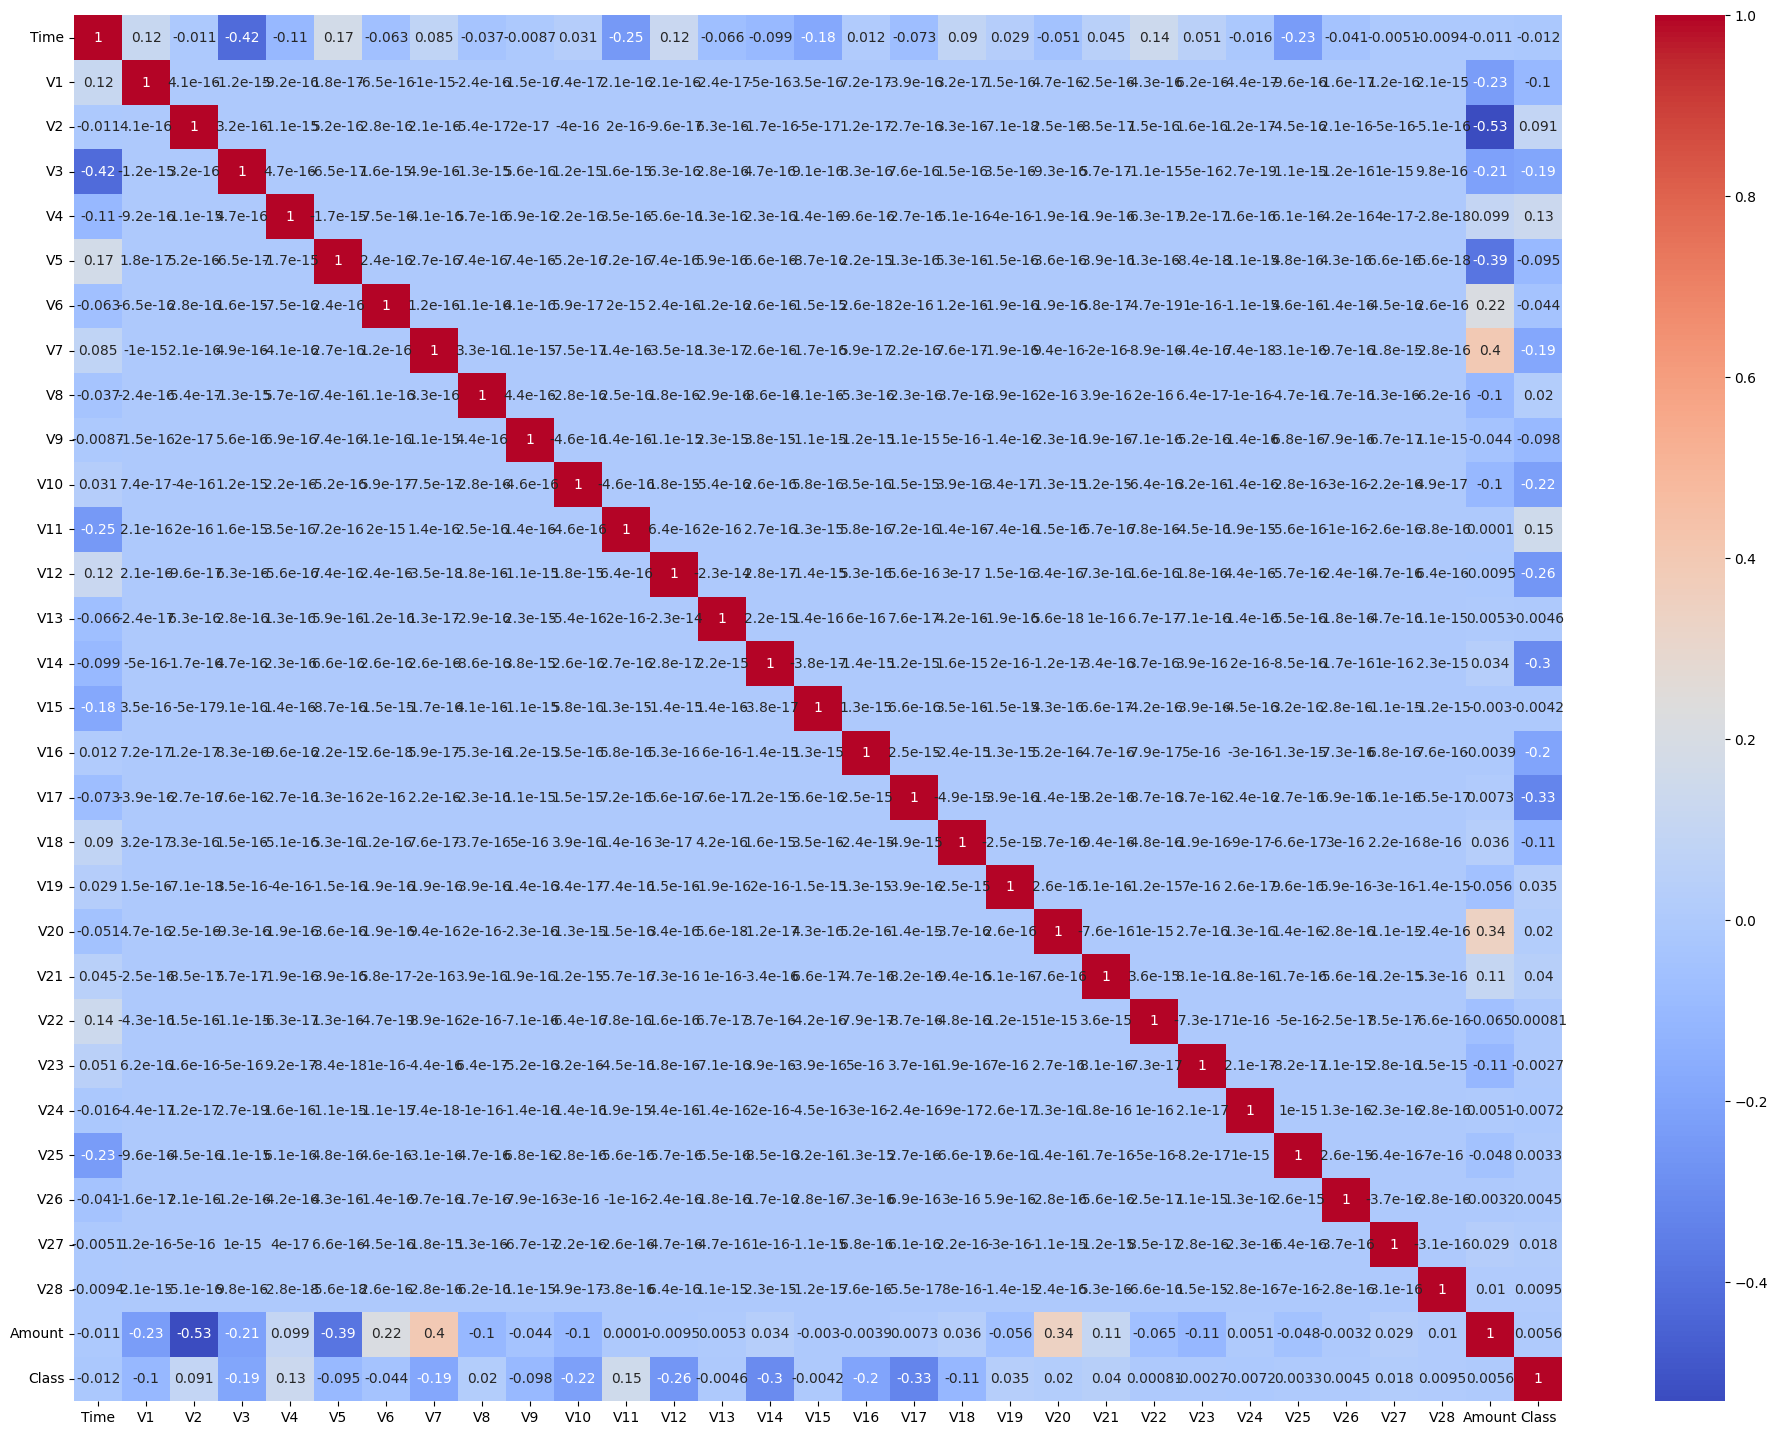

In [12]:
#checking the correlation in heatmap
plt.figure(figsize=(24,18))

sns.heatmap(corr,cmap="coolwarm",annot=True)
plt.show()

In [13]:
#As time is given in relative fashion , we are using pandas , timedelta which Represents a duration , the difference between two timedelta
Delta_time=pd.to_timedelta(df['Time'],unit='s')

#create derived columns mins and hours
df['Time_Day']=(Delta_time.dt.components.days).astype(int)
df['Time_Hour']=(Delta_time.dt.components.hours).astype(int)
df['Time_Min']=(Delta_time.dt.components.minutes).astype(int)

In [14]:
#Drop unnecessary columns
# we will drop Time , as we have derivation the Day/Hour/Minutes from the time column
df.drop('Time',axis=1,inplace=True)
# we will heep only derived column hour as day/minutes might not be very useful
df.drop(['Time_Day','Time_Min'],axis=1,inplace=True)

# Splitting the data into train and test data

In [15]:
# splitting the dataset into x and y
y=df['Class']
X=df.drop(['Class'],axis=1)

In [16]:
#checking some rows of y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [17]:
# splitting the dataset using train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=100
)

In [18]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


In [19]:
#Accumulating all the column name undder one variable 
cols=list(X.columns.values)

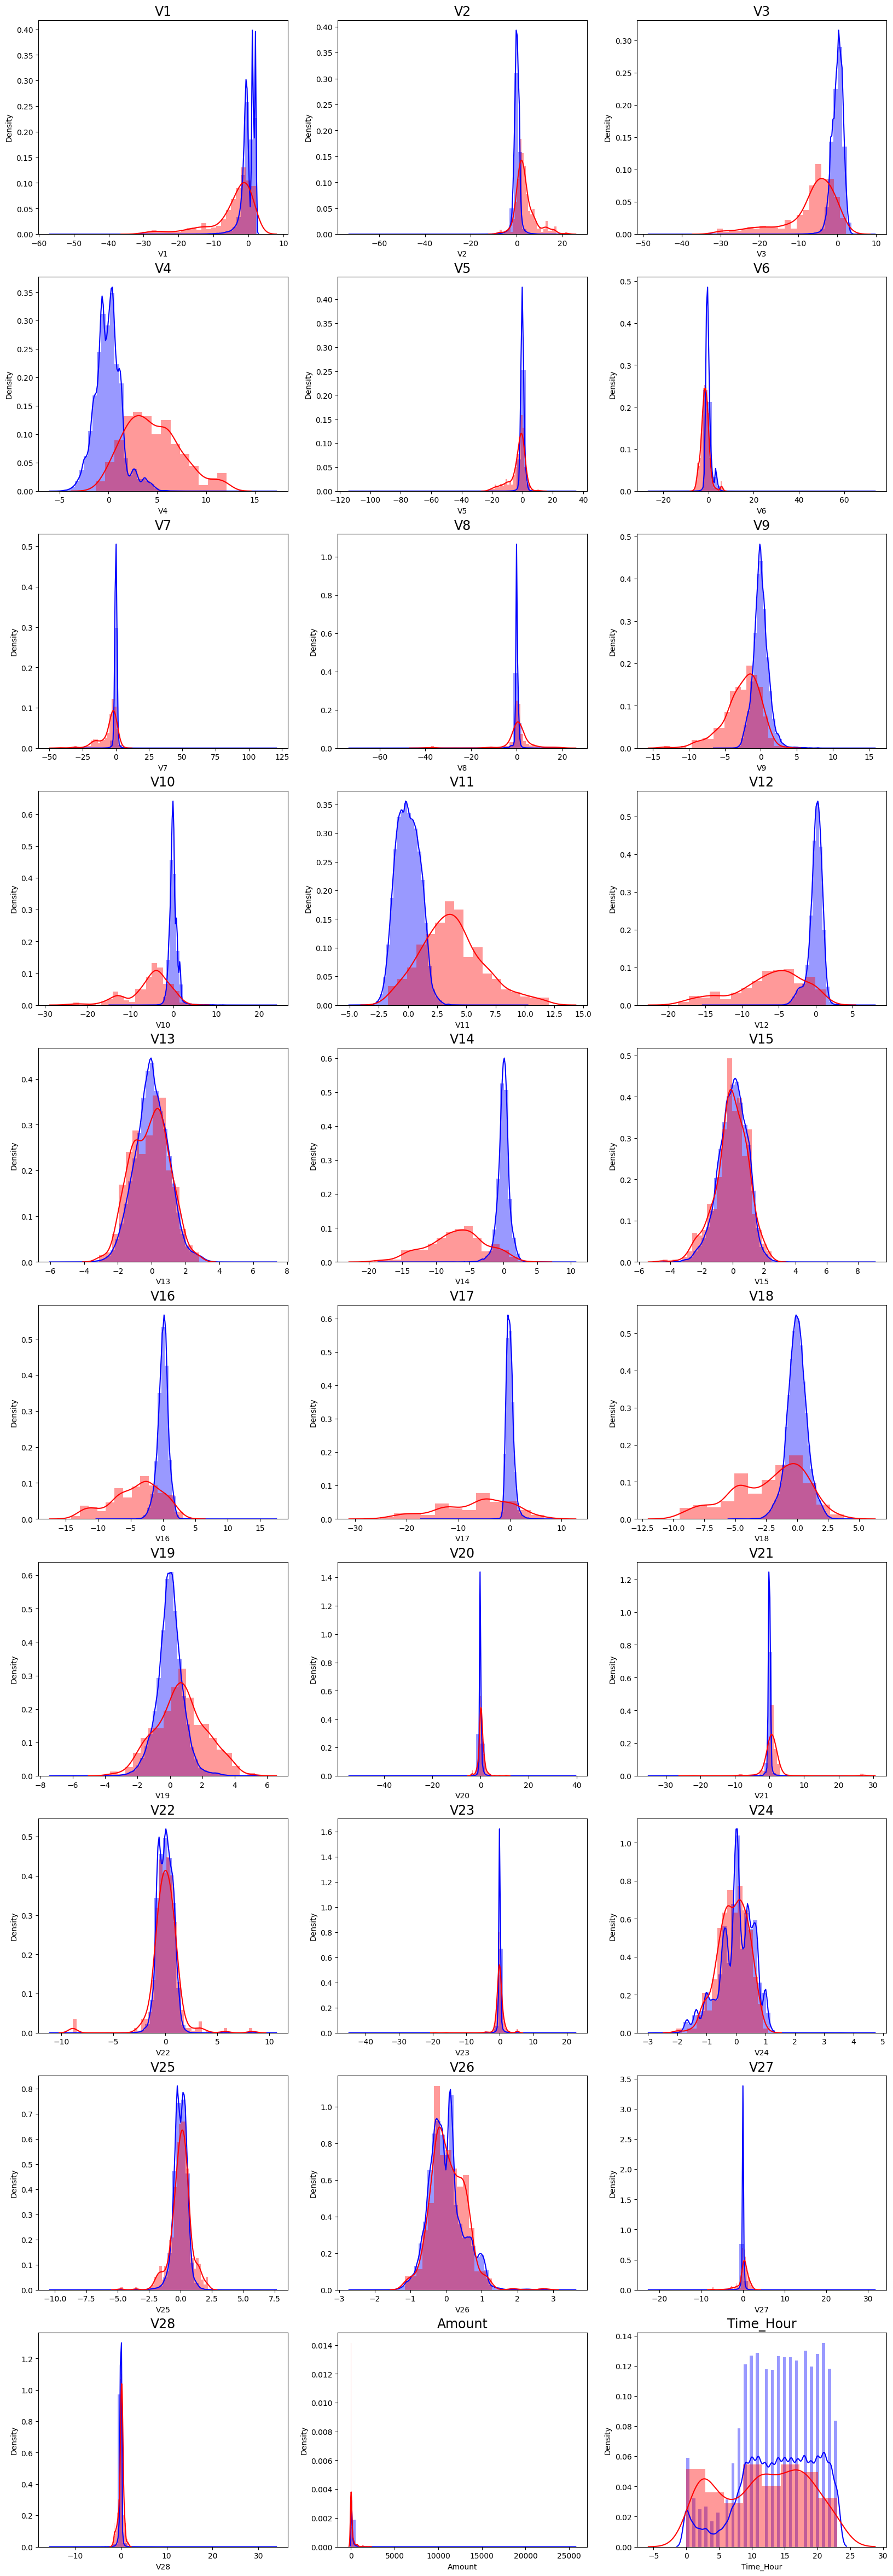

In [20]:
#plot the histogram of a vaiable from the dataset to see the skewness
normal_records=df.Class==0
fraud_records=df.Class==1

plt.figure(figsize=(20,60))
for n,col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.distplot(X[col][normal_records],color='blue')
    sns.distplot(X[col][fraud_records],color='red')
    plt.title(col,fontsize=17)
plt.show()


# Model Building

In [21]:
#create a dataframe to store results
df_Results=pd.DataFrame(columns=['Methodology','Model','Accuracy','roc_value','threshold'])


In [22]:
#create a common function to plot confusion materix
def plot_confusion_matrix(y_test,pred_test):
    cm=confusion_matrix(y_test,pred_test)
    plt.clf()
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Accent)
    categoryNames=['Non-Fraudalent','Fraudalent']
    plt.title('Confusion Matrix-Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ticks = np.arange(len(categoryNames))
    plt.xticks(ticks,categoryNames,rotation=45)
    plt.yticks(ticks,categoryNames)
    s=[['TN','FP'],['FN','TP']]

    for i in range(2):
        for j in range(2) :
            plt.text(j,i,str(s[i][j])+"="+str(cm[i][j]),fontsize=12)
    plt.show()

In [23]:
## created a common function to fit and predict on a Logistic Regression model for both L1 and L2
def buildAndRunLogisticModels(df_Results, Methodology, x_train, y_train, x_test, y_test):

    #logistic Regression
    from sklearn import linear_model
    from sklearn.model_selection import KFold

    num_C = list(np.power(10.0, np.arange(-10, 10)))
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

    # Logistic Regression with L2
    searchCV_l2 = linear_model.LogisticRegressionCV(
        Cs=num_C,
        penalty='l2',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='newton-cg',
        tol=10
    )
    # Logistic Regression with L1
    searchCV_l1 = linear_model.LogisticRegressionCV(
        Cs=num_C,
        penalty='l1',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='liblinear',
        tol=10
    )

    # Fit models
    searchCV_l1.fit(x_train, y_train)
    searchCV_l2.fit(x_train, y_train)
    
    print('Max auc_roc for l1:', np.mean(searchCV_l1.scores_[1], axis=0).max())
    print('Max auc_roc for l2:', np.mean(searchCV_l2.scores_[1], axis=0).max())


    print("parameters for l1 regularisations")
    print(searchCV_l1.coef_)
    print(searchCV_l1.intercept_)
    print(searchCV_l1.scores_)

    print("parameters for l2 regularisations")
    print(searchCV_l2.coef_)
    print(searchCV_l2.intercept_)
    print(searchCV_l2.scores_)

    # Predictions
    y_pred_l1 = searchCV_l1.predict(x_test)
    y_pred_l2 = searchCV_l2.predict(x_test)

    # Probabilities
    y_pred_probs_l1 = searchCV_l1.predict_proba(x_test)[:, 1]
    y_pred_probs_l2 = searchCV_l2.predict_proba(x_test)[:, 1]

    #Accuracy of L2/L1 model
    Accuracy_l2=metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
    Accuracy_l1=metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

    print("Accuracy of Logistic model with L2 regularisation: {:.4f}".format(Accuracy_l2))
    print("Confusion Matrix (L2):")
    plot_confusion_matrix(y_test, y_pred_l2)
    print("Classification Report (L2):")
    print(classification_report(y_test, y_pred_l2))

    print("Accuracy of Logistic model with L1 regularisation: {:.4f}".format(Accuracy_l1))
    print("Confusion Matrix (L1):")
    plot_confusion_matrix(y_test, y_pred_l1)
    print("Classification Report (L1):")
    print(classification_report(y_test, y_pred_l1)) 

    l2_roc_value=roc_auc_score(y_test,y_pred_probs_l2)
    print("12 roc value: {0}".format(l2_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
    threshold_l2=thresholds[np.argmax(tpr-fpr)]
    print("l2 threshold:{0}",format(threshold_l2))

    roc_auc_l2=metrics.auc(fpr,tpr)
    print("ROC for the test dataset",'{:.1%}',format(roc_auc_l2))
    plt.plot(fpr,tpr,label="Test,auc"+str(roc_auc_l2))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat(
        [
            df_Results,
            pd.DataFrame(
                {
                    'Methodology': [Methodology],
                    'Model': ['Logistic Regression with L2 Regularisation'],
                    'Accuracy': [Accuracy_l2],
                    'roc_value': [roc_auc_l2],
                    'threshold': [threshold_l2]
                }
            )
        ],
        ignore_index=True
    )


                                  
    l1_roc_value=roc_auc_score(y_test, y_pred_probs_l1)
    print("11 roc value: {0}".format(l1_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
    threshold_l1 = thresholds[np.argmax(tpr - fpr)]
    print("11 threshold:{0}",format(threshold_l1))

    roc_auc_l1=metrics.auc(fpr,tpr)
    print("ROC for the test dataset",'{:,1%}',format(roc_auc_l1))
    plt.plot(fpr,tpr,label="Test,auc"+str(roc_auc_l1))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat(
        [
            df_Results,
            pd.DataFrame(
                {
                    'Methodology': [Methodology],
                    'Model': ['Logistic Regression with L1 Regularisation'],
                    'Accuracy': [Accuracy_l1],
                    'roc_value': [roc_auc_l1],
                    'threshold': [threshold_l1]
                }
            )
        ],
        ignore_index=True
    )


    return df_Results

In [24]:
# Create a common function to fit and predict on a KNN model
def buildAndRunKNNModels(df_results, Methodology, X_train, y_train, X_test, y_test):

    # create KNN model and fit the model with train dataset
    knn = KNeighborsClassifier(n_neighbors = 5, n_jobs=16)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print("model score")
    print(score)

    #Accuracy
    y_pred = knn.predict(X_test)
    KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
    print("Confusion Matrix")
    plot_confusion_matrix(y_test, y_pred)
    print("classification Report")
    print(classification_report(y_test, y_pred))

    knn_probs = knn.predict_proba(X_test)[:, 1]

    # Calculate roc auc
    knn_roc_value = roc_auc_score(y_test, knn_probs)
    print("KNN roc_value: {}".format(knn_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("KNN threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", ".{:1%}".format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc={}".format(str(roc_auc)))
    plt.legend(loc=4)
    plt.show()
    df_results = pd.concat(
        [
            df_results,
            pd.DataFrame(
                {
                    'Methodology': [Methodology],
                    'Model': ['KNN'],
                    'Accuracy': [ score],
                    'roc_value': [ knn_roc_value],
                    'threshold': [threshold]
                }
            )
        ],
        ignore_index=True
    )

    return df_results

In [25]:
# Created a common function to fit and predict on a Tree models for both gini and entropy criteria
def buildAndRunTreeModels(df_results, Methodology, X_train, y_train, X_test, y_test):

    #Evaluate Decision Tree Model with 'gini' & 'entropy'
    criteria = ['gini', 'entropy']
    scores = {}

    for c in criteria:
        dt = DecisionTreeClassifier(criterion = c, random_state=42)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        
        test_score = dt.score(X_test, y_test)
        tree_preds = dt.predict_proba(X_test)[:, 1]
        
        tree_roc_value = roc_auc_score(y_test, tree_preds)
        scores = test_score
        
        print(c + " score: {0}".format(test_score))
        print("Confusion Matrix")
        plot_confusion_matrix(y_test, y_pred)
        print("Classification Report")
        print(classification_report(y_test, y_pred))
        
        print(c + " tree_roc_value: {0}".format(tree_roc_value))
        fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
        threshold = thresholds[np.argmax(tpr-fpr)]
        print("Tree threshold: {0}".format(threshold))
        roc_auc = metrics.auc(fpr, tpr)
        print("ROC for the test dataset", "{:.1%}".format(roc_auc))
        plt.plot(fpr, tpr, label="Test, auc={}".format(str(roc_auc)))
        plt.legend(loc=4)
        plt.show()
        df_results = pd.concat(
        [
            df_results,
            pd.DataFrame(
                {
                    'Methodology': [Methodology],
                    'Model': ['Tree Model with {0} criteria'.format(c)],
                    'Accuracy': [test_score],
                    'roc_value': [ tree_roc_value],
                    'threshold': [threshold]
                }
            )
        ],
        ignore_index=True
    )

    return df_results

In [26]:
# Created a common function to fit and predict on a Random Forest model
def buildAndRunRandomForestModels(df_results, Methodology, X_train, y_train, X_test, y_test):

    # Evaluate Random Forest model
    
    # Create the model with 100 trees
    RF_model = RandomForestClassifier(n_estimators=100,
                                       bootstrap = True,
                                       max_features = 'sqrt', random_state=42)
    
    # Fit on training data
    RF_model.fit(X_train, y_train)
    RF_test_score = RF_model.score(X_test, y_test)
    RF_model.predict(X_test)
    
    print('Model Accuracy: {0}'.format(RF_test_score))
    
    # Actual class predictions
    rf_predictions = RF_model.predict(X_test)
    
    print("Confusion Matrix")
    plot_confusion_matrix(y_test, rf_predictions)
    print("Classification Report")
    print(classification_report(y_test, rf_predictions))
    
    # Probabilities for each class
    rf_probs = RF_model.predict_proba(X_test)[:, 1]
    
    # Calculate roc auc
    roc_value = roc_auc_score(y_test, rf_probs)
    print("Random Forest roc_value: {0}".format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Random Forest threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", "{:.1%}".format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc={}".format(str(roc_auc)))
    plt.legend(loc=4)
    plt.show()
    
    df_results = pd.concat(
        [
            df_results,
            pd.DataFrame(
                {
                    'Methodology': [Methodology],
                    'Model': ['Random Forest'],
                    'Accuracy': [ RF_test_score],
                    'roc_value': [roc_value],
                    'threshold': [threshold]
                }
            )
        ],
        ignore_index=True
    )

    return df_results

In [27]:
# Created a common function to fit and predict on a XGBoost model
def buildAndRunXGBoostModels(df_results, methodology, X_train, y_train, X_test, y_test):

    #Evaluate XGBoost model
    XGBmodel = XGBClassifier(random_state=42)
    XGBmodel.fit(X_train, y_train)
    y_pred = XGBmodel.predict(X_test)
    
    XGB_test_score = XGBmodel.score(X_test, y_test)
    print('Model Accuracy: {0}'.format(XGB_test_score))

    print("Confusion Matrix")
    plot_confusion_matrix(y_test, y_pred)
    print("classification Report")
    print(classification_report(y_test, y_pred))

    # Probabilities for each class
    XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

    # Calculate roc auc
    XGB_roc_value = roc_auc_score(y_test, XGB_probs)

    print("XGBoost roc_value: {0}".format(XGB_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("XGBoost threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", "{:.1%}".format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc={}".format(str(roc_auc)))
    plt.legend(loc=4)
    plt.show()

    df_results = pd.concat(
        [
            df_results,
            pd.DataFrame(
                {
                    'Methodology': [methodology],
                    'Model': ['XGBoost'],
                    'Accuracy': [ XGB_test_score],
                    'roc_value': [XGB_roc_value],
                    'threshold': [threshold]
                }
            )
        ],
        ignore_index=True
    )

    return df_results

In [28]:
# Created a common function to fit and predict on a SVM model
def buildAndRunSVMModels(df_results, methodology, X_train, y_train, X_test, y_test):
    #Evaluate SVM model with sigmoid kernel model
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import roc_auc_score

    clf = SVC(kernel='sigmoid', random_state=42)
    clf.fit(X_train, y_train)
    y_pred_SVM = clf.predict(X_test)
    SVM_Score = accuracy_score(y_test, y_pred_SVM)
    print("accuracy_score : {0}".format(SVM_Score))
    print("Confusion Matrix")
    plot_confusion_matrix(y_test, y_pred_SVM)
    print("classification Report")
    print(classification_report(y_test, y_pred_SVM))

    # Run classifier
    classifier = SVC(kernel='sigmoid', probability=True)
    svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

    # Calculate roc auc
    roc_value = roc_auc_score(y_test, svm_probs)

    print("SVM roc_value: {0}".format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("SVM threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", "{:.1%}".format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc={}".format(str(roc_auc)))
    plt.legend(loc=4)
    plt.show()
    df_results = pd.concat(
        [
            df_results,
            pd.DataFrame(
                {
                    'Methodology': [methodology],
                    'Model': ['SVM'],
                    'Accuracy': [SVM_Score],
                    'roc_value': [ roc_value],
                    'threshold': [threshold]
                }
            )
        ],
        ignore_index=True
    )

    return df_results


# Performance cross validation with RepeatedKFold

In [29]:
# Lets perform RepeatedKFolds and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [     0      2      4 ... 284802 284805 284806] TEST: [     1      3      9 ... 284801 284803 284804]
TRAIN: [     0      1      3 ... 284804 284805 284806] TEST: [     2     10     20 ... 284790 284795 284800]
TRAIN: [     1      2      3 ... 284803 284804 284806] TEST: [     0      6     13 ... 284796 284799 284805]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     4      5      8 ... 284793 284798 284802]
TRAIN: [     0      1      2 ... 284803 284804 284805] TEST: [     7     11     12 ... 284788 284789 284806]
TRAIN: [     0      5      6 ... 284804 284805 284806] TEST: [     1      2      3 ... 284799 284802 284803]
TRAIN: [     0      1      2 ... 284802 284803 284805] TEST: [     5      6     10 ... 284797 284804 284806]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     8     11     13 ... 284795 284798 284801]
TRAIN: [     0      1      2 ... 284803 284804 284806] TEST: [     9     15     16 ... 284790 284800 284805]
TRAIN: [     1     

In [ ]:
# Run Logistic Regression with L1 and L2 Regularisation
print("Logistic Regression with L1 and L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60)

# Run KNN Model

print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60)

# Run Decision Tree Models with 'gini' & 'entropy' criteria
print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60)

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60)

#Run XGBoost Models
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60)

#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60)


In [31]:
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.997999,0.568316,0.499276
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.999017,0.873596,0.059170
2,RepeatedKFold Cross Validation,KNN,0.999140,0.876979,0.200000
3,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.999087,0.885736,1.000000
4,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999333,0.890237,1.000000
5,RepeatedKFold Cross Validation,Random Forest,0.999561,0.945826,0.020000
6,RepeatedKFold Cross Validation,XGBoost,0.999421,0.934414,0.000081
7,RepeatedKFold Cross Validation,SVM,0.998104,0.470618,0.004347


# Performnce cross validation with strantifieKFold

In [32]:
#Lets perfom StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l1: 0.9652106893977332
Max auc_roc for l2: 0.5597020083683936
parameters for l1 regularisations
[[-0.03660539 -0.1358827  -0.20474594  0.04333662 -0.24034598  0.08416903
   0.12654905 -0.04815306 -0.14258132 -0.1384162  -0.11668372  0.05505155
  -0.15637116 -0.24216184 -0.03137093 -0.09904364 -0.23133976  0.05582481
   0.02122044  0.20503748  0.09013502  0.00148754 -0.03796378 -0.00392139
  -0.14797782 -0.00701001 -0.06594801 -0.00660368 -0.00656465 -0.12981985]]
[-2.0409044]
{np.int64(1): array([[0.5       , 0.5       , 0.5       , 0.5       , 0.48341269,
        0.44979055, 0.48500892, 0.78098262, 0.9497821 , 0.94525947,
        0.91827811, 0.91446679, 0.94989144, 0.94933682, 0.94178407,
        0.94900653, 0.92481293, 0.94421561, 0.9164553 , 0.97793244],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.54612019,
        0.57709187, 0.60597219, 0.84651057, 0.93343227, 0.93465714,
        0.92629828, 0.92557122

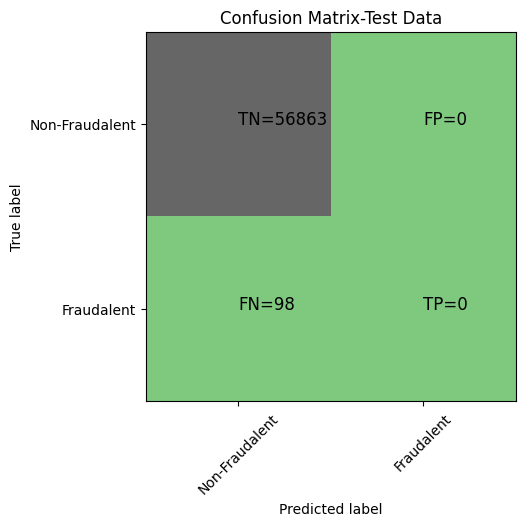

Classification Report (L2):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic model with L1 regularisation: 0.9988
Confusion Matrix (L1):


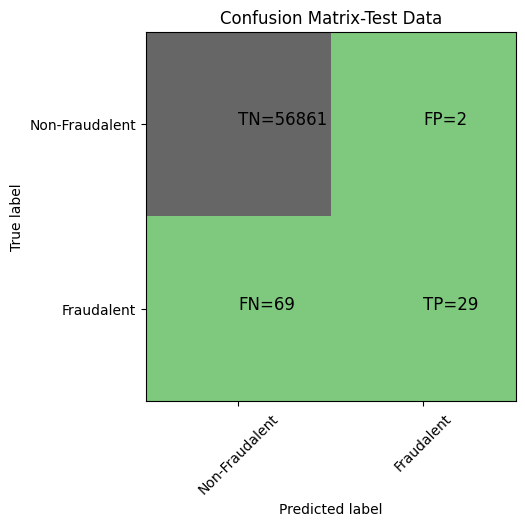

Classification Report (L1):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.97      0.65      0.72     56961
weighted avg       1.00      1.00      1.00     56961

12 roc value: 0.6111619154810686
l2 threshold:{0} 0.4993921957728673
ROC for the test dataset {:.1%} 0.6111619154810686


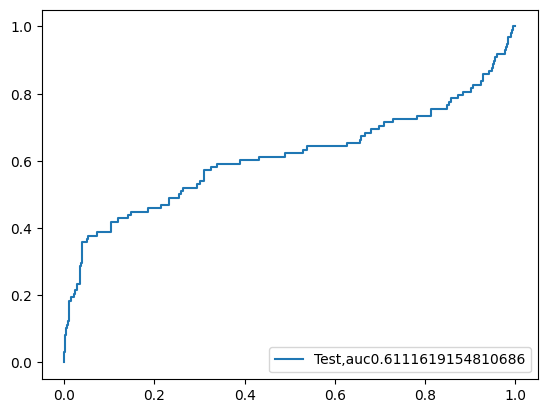

11 roc value: 0.8890758561483437
11 threshold:{0} 0.021087492766199856
ROC for the test dataset {:,1%} 0.8890758561483437


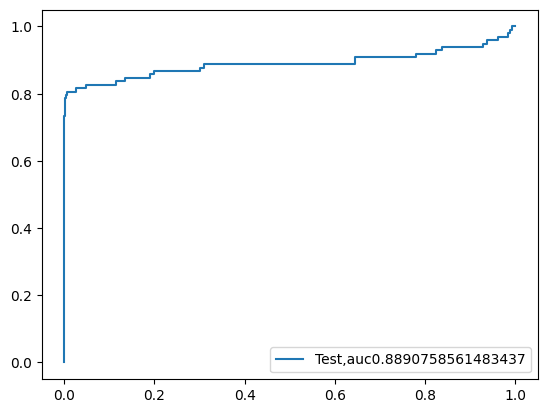

Time Taken by Model: --- 100.91829228401184 seconds ---
------------------------------------------------------------
KNN Model
model score
0.9991924299081828
Confusion Matrix


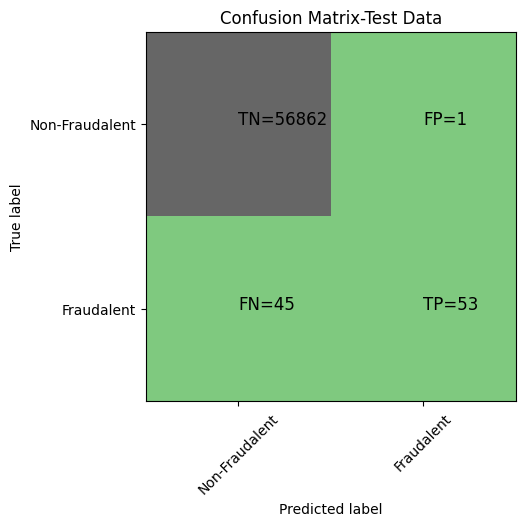

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.54      0.70        98

    accuracy                           1.00     56961
   macro avg       0.99      0.77      0.85     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8057457828285457
KNN threshold: 0.2
ROC for the test dataset .80.574578%


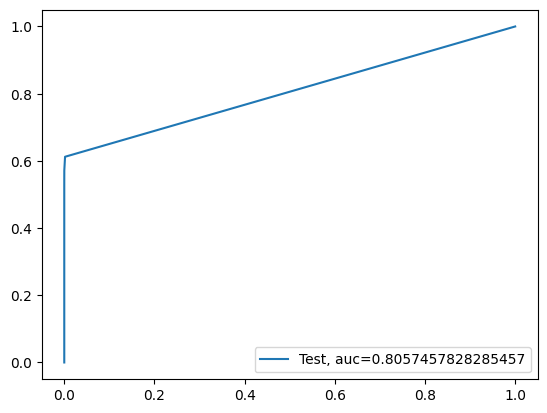

Time Taken by Model: --- 43.662365674972534 seconds ---
------------------------------------------------------------
Decision Tree Models with `gini` & `entropy` criteria
gini score: 0.998841312476958
Confusion Matrix


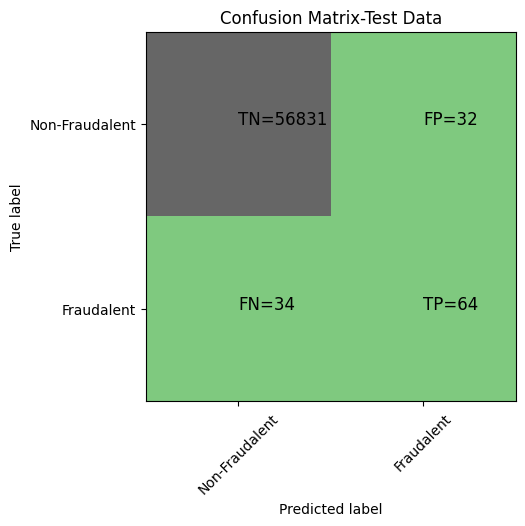

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.65      0.66        98

    accuracy                           1.00     56961
   macro avg       0.83      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8262492341959029
Tree threshold: 1.0
ROC for the test dataset 82.6%


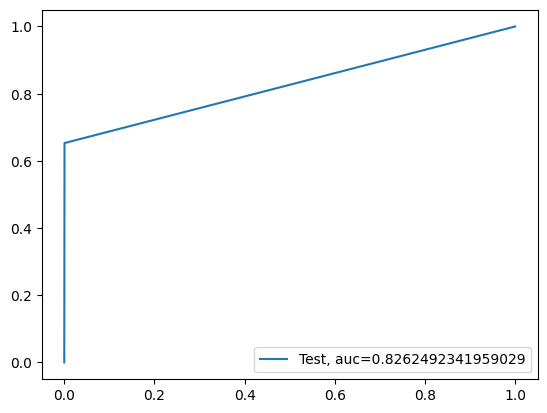

entropy score: 0.9990168711925703
Confusion Matrix


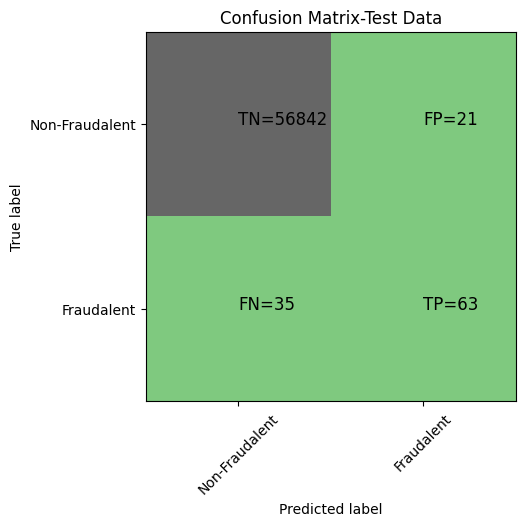

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.64      0.69        98

    accuracy                           1.00     56961
   macro avg       0.87      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8212439170839185
Tree threshold: 1.0
ROC for the test dataset 82.1%


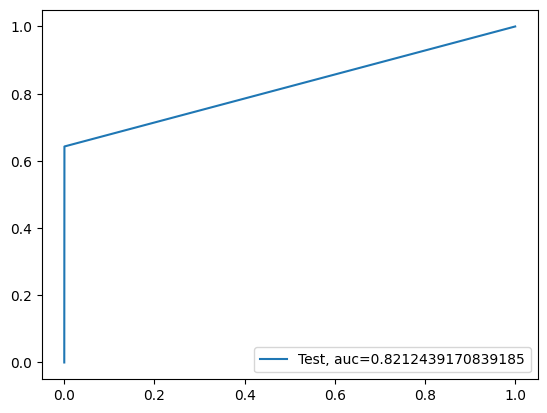

Time Taken by Model: --- 52.51179480552673 seconds ---
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


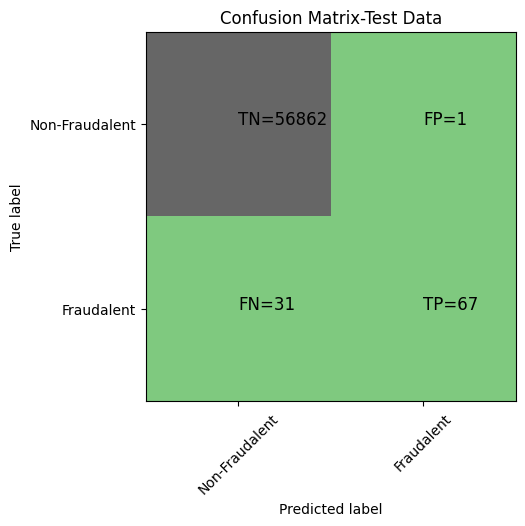

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.68      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9464721329855826
Random Forest threshold: 0.01
ROC for the test dataset 94.6%


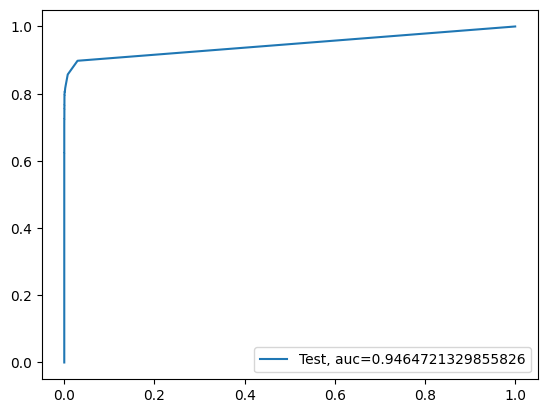

Time Taken by Model: --- 344.28104186058044 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9991748740366215
Confusion Matrix


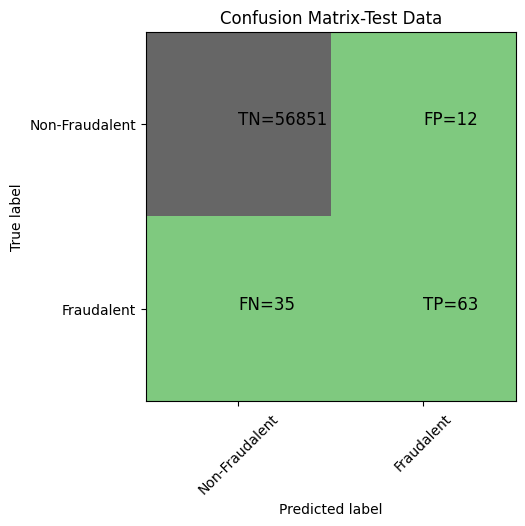

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.84      0.64      0.73        98

    accuracy                           1.00     56961
   macro avg       0.92      0.82      0.86     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9192701613293964
XGBoost threshold: 7.963625103002414e-05
ROC for the test dataset 91.9%


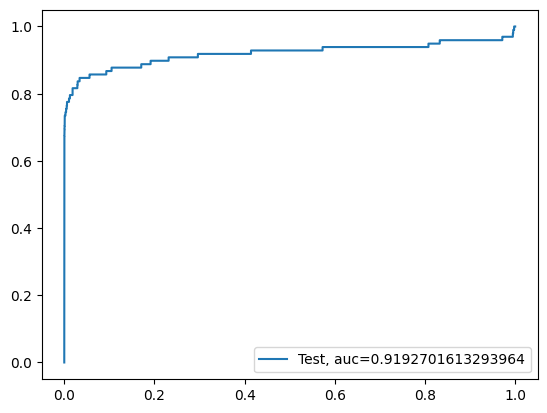

Time Taken by Model: --- 1.7601633071899414 seconds ---
------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9982795245869981
Confusion Matrix


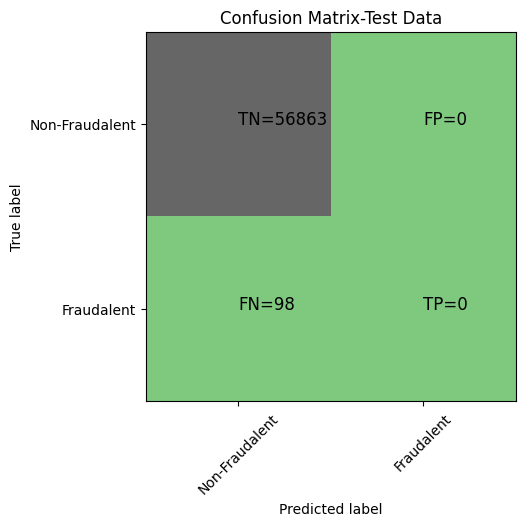

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.40177034885494567
SVM threshold: 0.002035152455255511
ROC for the test dataset 40.2%


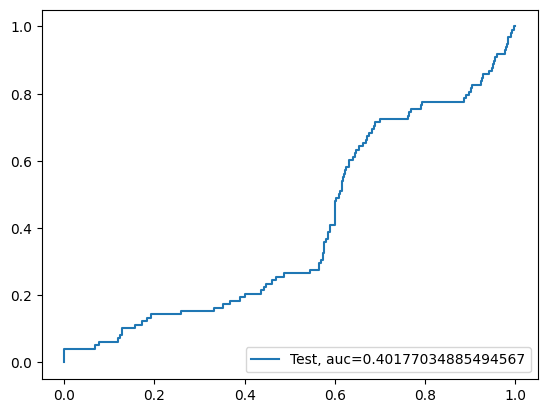

Time Taken by Model: --- 781.322359085083 seconds ---
------------------------------------------------------------


In [33]:
# Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, "StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("-" * 60)

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, "StratifiedKFold Cross Validation",X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("-" * 60)

#Run Decision Tree Models with `gini` & `entropy` criteria
print("Decision Tree Models with `gini` & `entropy` criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, "StratifiedKFold Cross Validation",X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("-" * 60)

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("-" * 60)

#Run XGBoost Models
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "StratifiedKFold Cross 
\

                                      
                                      
                                      
                                      
                                      Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("-" * 60)

#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results, "StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print("-" * 60)


In [34]:
# checking the df_result dataframe which contains consolidated results of the runs
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.997999,0.568316,0.499276
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.999017,0.873596,0.059170
2,RepeatedKFold Cross Validation,KNN,0.999140,0.876979,0.200000
3,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.999087,0.885736,1.000000
4,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999333,0.890237,1.000000
5,RepeatedKFold Cross Validation,Random Forest,0.999561,0.945826,0.020000
6,RepeatedKFold Cross Validation,XGBoost,0.999421,0.934414,0.000081
7,RepeatedKFold Cross Validation,SVM,0.998104,0.470618,0.004347
8,StratifiedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998280,0.611162,0.499392
9,StratifiedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998754,0.889076,0.021087


## Result for cross validation with stratifiedKFold

looking at the ROC value Random Forest  has Proved best results for cross validation with stratifiedKFold technique 

## Conclusion

Your best result is from Random Forest with Repeated KFold Cross Validation (highest ROC = 0.9646, accuracy = 0.9996).
Second-best is XGBoost with Repeated KFold CV (highest ROC=0.9610	 , accuracy=	0.999421)

In [35]:
# Logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

clf = linear_model.LogisticRegressionCV(
    Cs= num_C
    ,penalty='l2'
    ,scoring='roc_auc'
    ,cv=cv_num
    ,random_state=42
    ,max_iter=10000
    ,fit_intercept=True
    ,solver='newton-cg'
    ,tol=10

)

clf.fit(X_train_SKF_cv, y_train_SKF_cv)
print ('Max auc_roc for l2:', clf.scores_[1].mean(axis=0).max())


print("Parameters for l2 regularisations")
print(clf.coef_)
print(clf.intercept_)
print(clf.scores_)

#find predicted vallues
y_pred_l2 = clf.predict(X_test)

#Find predicted probabilities
y_pred_probs_l2 = clf.predict_proba(X_test)[:,1]

# Accuaracy of L2/L1 models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)

print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))

from sklearn.metrics import roc_auc_score
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}".format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold))


Max auc_roc for l2: 0.5597020083683936
Parameters for l2 regularisations
[[ 3.59840980e-07  2.10530060e-07 -1.58002317e-06 -2.04884044e-07
   3.76472678e-07 -2.67633109e-07  3.13241030e-08 -1.20226136e-08
  -8.98863463e-08 -1.54002314e-07 -4.65334035e-07  1.57441535e-07
  -1.27094538e-07 -4.38050832e-07 -3.73274685e-07 -8.23337714e-08
  -3.16607926e-07  1.01807717e-07  7.54814354e-08 -6.47175864e-08
   7.04219521e-08  1.73013268e-07  7.32726162e-08 -1.03599764e-08
  -2.85545640e-07 -2.03747293e-08  3.38203553e-09 -1.32510707e-08
  -6.82254904e-04 -9.57433590e-05]]
[-7.52178855e-06]
{np.int64(1): array([[0.48266925, 0.48178322, 0.47951852, 0.47631818, 0.47631818,
        0.47631818, 0.47631818, 0.47631818, 0.47631818, 0.47631818,
        0.47631818, 0.47631818, 0.47631818, 0.47631818, 0.47631818,
        0.47631818, 0.47631818, 0.47631818, 0.47631818, 0.47631818],
       [0.55602862, 0.55598183, 0.55533056, 0.55524448, 0.55524448,
        0.55524448, 0.55524448, 0.55524448, 0.55524448, 

In [36]:
#checking for the coefficient values 
clf.coef_

array([[ 3.59840980e-07,  2.10530060e-07, -1.58002317e-06,
        -2.04884044e-07,  3.76472678e-07, -2.67633109e-07,
         3.13241030e-08, -1.20226136e-08, -8.98863463e-08,
        -1.54002314e-07, -4.65334035e-07,  1.57441535e-07,
        -1.27094538e-07, -4.38050832e-07, -3.73274685e-07,
        -8.23337714e-08, -3.16607926e-07,  1.01807717e-07,
         7.54814354e-08, -6.47175864e-08,  7.04219521e-08,
         1.73013268e-07,  7.32726162e-08, -1.03599764e-08,
        -2.85545640e-07, -2.03747293e-08,  3.38203553e-09,
        -1.32510707e-08, -6.82254904e-04, -9.57433590e-05]])

In [37]:
#creating a dataframe with the coefficient values 
coefficients = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(clf.coef_))],axis=1)
coefficients.columns=['Feature','Importance Coefficient']
coefficients

,Feature,Importance Coefficient
0,V1,3.598410e-07
1,V2,2.105301e-07
2,V3,-1.580023e-06
3,V4,-2.048840e-07
4,V5,3.764727e-07
5,V6,-2.676331e-07
6,V7,3.132410e-08
7,V8,-1.202261e-08
8,V9,-8.988635e-08
9,V10,-1.540023e-07


In [ ]:
#1. Random Forest Hyperparameter Tuning + Feature Importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import pandas as pd

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],   # number of trees
    'max_depth': [None, 10, 20, 30],   # tree depth
    'min_samples_split': [2, 5, 10],   # min samples to split
    'min_samples_leaf': [1, 2, 4],     # min samples per leaf
    'max_features': ['sqrt', 'log2']   # features per split
}

# GridSearchCV
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=param_grid_rf,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1,
                       verbose=2)

# Fit
grid_rf.fit(X_train_SKF_cv, y_train_SKF_cv)

# Best Model
best_rf = grid_rf.best_estimator_
print("Best Random Forest Parameters:", grid_rf.best_params_)

# Evaluate on test set
y_pred_rf = best_rf.predict(X_test_SKF_cv)
y_pred_probs_rf = best_rf.predict_proba(X_test_SKF_cv)[:,1]

print("Random Forest Accuracy:", metrics.accuracy_score(y_test_SKF_cv, y_pred_rf))
print("Random Forest ROC AUC:", metrics.roc_auc_score(y_test_SKF_cv, y_pred_probs_rf))

# Feature Importance
importances_rf = pd.Series(best_rf.feature_importances_, index=X_train_SKF_cv.columns)
importances_rf.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), title="Random Forest Feature Importance")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
